This notebook uses a simple FFT to compute the kinetic energy power spectrum.

Data being used is a CAM-SE ne30 simulation that has been remapped to three different regular grids.


In [1]:
from pathlib import Path
import xarray as xr


loc = Path("/glade/campaign/cgd/amp/brianpm/tmp_ctl_remap")

ds100 = xr.open_dataset(loc / "tst.nc")

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/home/brianpm/miniconda3/envs/py11mjo/share/proj failed


In [4]:
ke_100 = 0.5*(ds100['U850']**2 + ds100['V850']**2)

In [28]:
print(ke_100.shape)
print(f"MEAN: {ke_100.isel(time=0,lat=90).mean().item()}")
print(f"VARIANCE: {ke_100.isel(time=0,lat=90).var().item()}")

(90, 180, 360)
MEAN: 45.475608825683594
VARIANCE: 1725.4781494140625


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ke_100_fft = np.fft.fft(ke_100.isel(time=0).values, axis=-1)

In [22]:
frq = np.fft.fftfreq(360, d=1/360) # I think with d=1/360 it is just wavenumber for 1degree grid
print(frq)

[   0.    1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.
   12.   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
   24.   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.
   36.   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.
   48.   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.
   60.   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.
   72.   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.
   84.   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.
   96.   97.   98.   99.  100.  101.  102.  103.  104.  105.  106.  107.
  108.  109.  110.  111.  112.  113.  114.  115.  116.  117.  118.  119.
  120.  121.  122.  123.  124.  125.  126.  127.  128.  129.  130.  131.
  132.  133.  134.  135.  136.  137.  138.  139.  140.  141.  142.  143.
  144.  145.  146.  147.  148.  149.  150.  151.  152.  153.  154.  155.
  156.  157.  158.  159.  160.  161.  162.  163.  1

In [12]:
ke_100_fft.shape

(180, 360)

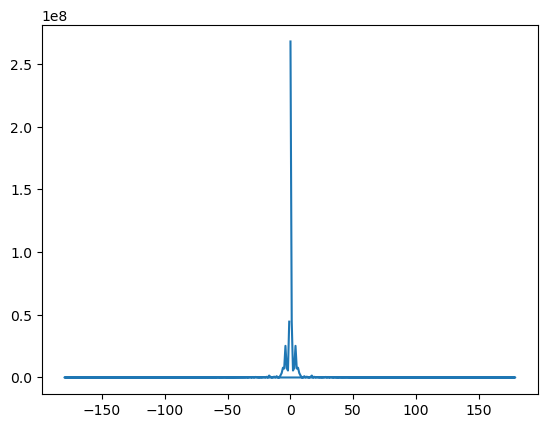

In [31]:
plt.plot(frq, np.absolute(ke_100_fft[90,:])**2)

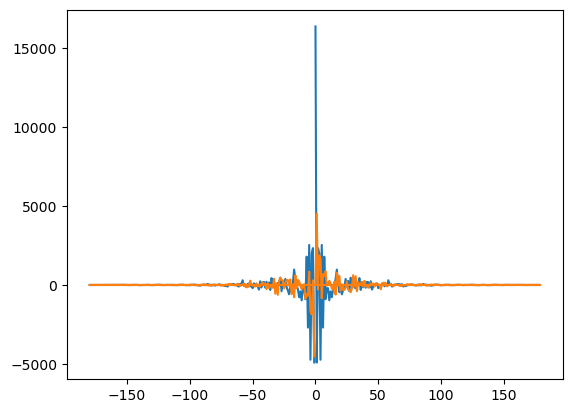

In [30]:
plt.plot(frq, ke_100_fft[90,:].real, frq, ke_100_fft[90,:].imag)

In [33]:
np.sum(np.absolute(ke_100_fft[90,:])**2)

491638786.76583207

In [37]:
np.abs(ke_100_fft[90,179:182])

array([1.65682096, 1.78129512, 1.65682096])

In [39]:
# what if we remove the mean first
anom_ke_100 = ke_100 - ke_100.mean()
ake_100_fft = np.fft.fft(anom_ke_100.isel(time=0).values, axis=-1)

264822124.86759543
735617.0135210983


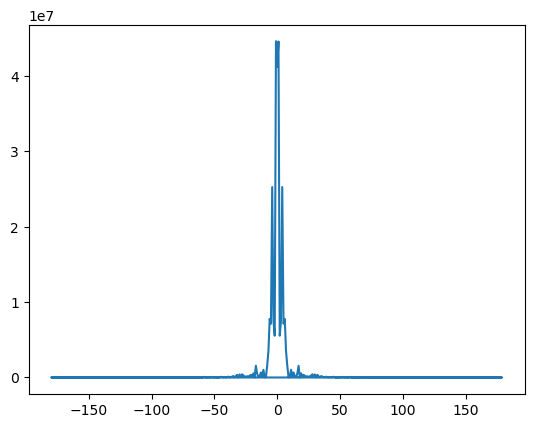

In [78]:

signal = ake_100_fft[90,:] # mean has been removed



plt.plot(frq, np.absolute(ake_100_fft[90,:])**2)
print(np.sum(np.absolute(ake_100_fft[90,:])**2))




print( np.sum(
         np.absolute(
             (/np.sqrt(len(ake_100_fft[90,:])))))
     )

In [71]:
print(anom_ke_100.isel(time=0,lat=90).var().item())
print(np.sum(np.absolute(ake_100_fft[90,0:180])**2))

1725.477783203125
153011138.66186655


In [68]:
from scipy.signal import welch

f, psd = welch(ke_100.isel(time=0, lat=90).values,
               fs=360.,  # sample rate
               window='hann',   # apply a Hanning window before taking the DFT
               nperseg=300,        # compute periodograms of nperseg-long segments of x
               detrend='constant') # detrend x by subtracting the mean

Welch sum: 1844.1707763671875


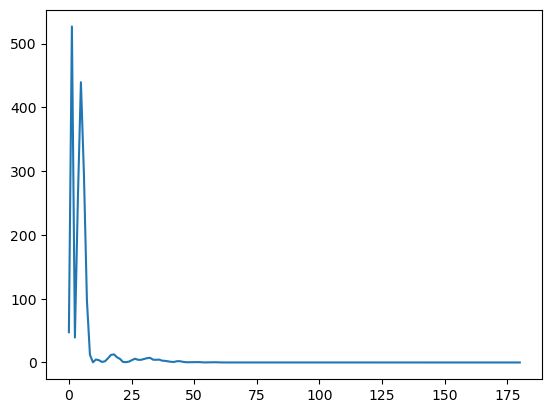

In [69]:
print(f"Welch sum: {psd.sum()}")
plt.plot(f, psd)

In [79]:



import os
import os.path
import glob

In [80]:
tsloc = "/glade/scratch/brianpm/fakefiles"

In [94]:
constit_files= [sorted(glob.glob(os.path.join(tsloc,f"*.{v}.*"))) for v in ['FLNT', 'FSNT']]

In [95]:
constit_files

[['/glade/scratch/brianpm/adf-output/ADF-data/timeseries/b.e23_alpha16b.BLT1850.ne30_t232.054/1-102/b.e23_alpha16b.BLT1850.ne30_t232.054.cam.h0.FLNT.000101-010212.nc.pid15808.ncrcat.tmp'],
 ['/glade/scratch/brianpm/adf-output/ADF-data/timeseries/b.e23_alpha16b.BLT1850.ne30_t232.054/1-102/b.e23_alpha16b.BLT1850.ne30_t232.054.cam.h0.FSNT.000101-010212.nc.pid15809.ncrcat.tmp']]

In [96]:
flat_list = []
for elem in constit_files:
    flat_list += elem
flat_list

['/glade/scratch/brianpm/adf-output/ADF-data/timeseries/b.e23_alpha16b.BLT1850.ne30_t232.054/1-102/b.e23_alpha16b.BLT1850.ne30_t232.054.cam.h0.FLNT.000101-010212.nc.pid15808.ncrcat.tmp',
 '/glade/scratch/brianpm/adf-output/ADF-data/timeseries/b.e23_alpha16b.BLT1850.ne30_t232.054/1-102/b.e23_alpha16b.BLT1850.ne30_t232.054.cam.h0.FSNT.000101-010212.nc.pid15809.ncrcat.tmp']

In [101]:
for i in flat_list:
    print(Path(i).is_file())

True
False


In [100]:
Path(i).unlink()